In [1]:
def Mk4_moments(f_Mk4, Spectra):
# routine to calculate the spectral moments: m0; m1; and m2 from an input Mk4 spectra   
    Ax1 = (f_Mk4[45] - f_Mk4[0]) / 45
    Ax2 = (f_Mk4[78] - f_Mk4[45]) / 32
    Ax3 = (f_Mk4[99] - f_Mk4[78]) / 21

# calc spectral moments m0, m1, and m2
    s00 = 0; s10 = 0; s20 = 0; m0 = 0
    s01 = 0; s11 = 0; s21 = 0; m1 = 0
    s02 = 0; s12 = 0; s22 = 0; m2 = 0
    for j in range(1,44):
        s00 += Spectra[j]
        s01 += f_Mk4[j] * Spectra[j]
        s02 += f_Mk4[j]**2 * Spectra[j]
    m0 = 0.5*Ax1*(Spectra[0] + 2*s00 + Spectra[45])
    m1 = 0.5*Ax1*(f_Mk4[0]*Spectra[0]+2*s01+f_Mk4[45]*Spectra[45])
    m2 = 0.5*Ax1*(f_Mk4[0]**2*Spectra[0]+2*s02+f_Mk4[45]**2*Spectra[45])

    for j in range(46,77):
        s10 += Spectra[j]
        s11 += f_Mk4[j] * Spectra[j]
        s12 += f_Mk4[j]**2 * Spectra[j]
    m0 += 0.5*Ax2*(Spectra[45] + 2*s10 + Spectra[78])
    m1 += 0.5*Ax2*(f_Mk4[45]*Spectra[45]+2*s11+f_Mk4[78]*Spectra[78])
    m2 += 0.5*Ax2*(f_Mk4[45]**2*Spectra[45]+2*s12+f_Mk4[78]**2*Spectra[78])

    for j in range(79,98):
        s20 += Spectra[j]
        s21 += f_Mk4[j] * Spectra[j]
        s22 += f_Mk4[j]**2 * Spectra[j]
    m0 += 0.5*Ax3*(Spectra[78] + 2*s20 + Spectra[99])
    m1 += 0.5*Ax3*(f_Mk4[78]*Spectra[78]+2*s21+f_Mk4[99]*Spectra[99])
    m2 += 0.5*Ax3*(f_Mk4[78]**2*Spectra[78]+2*s22+f_Mk4[99]**2*Spectra[99])

    return (m0,m1,m2)

In [2]:
def get_file():

# Select input file - code from https://pythonspot.com/tk-file-dialogs/
    root = Tk()
    root.filename =  filedialog.askopenfilename(initialdir = "C:\QGHL\Wave_data\tweedheads_4225\HVA",\
                    title = "Select .ASCII file",filetypes = (("CSV files","*.CSV"),("all files","*.*")))
    root.destroy()

    return(root.filename)

1546299000
Hs =  1.4675733754346705
Mean Period (T1) =  6.309708792352972
Average Period (T02) =  5.6882547443809575


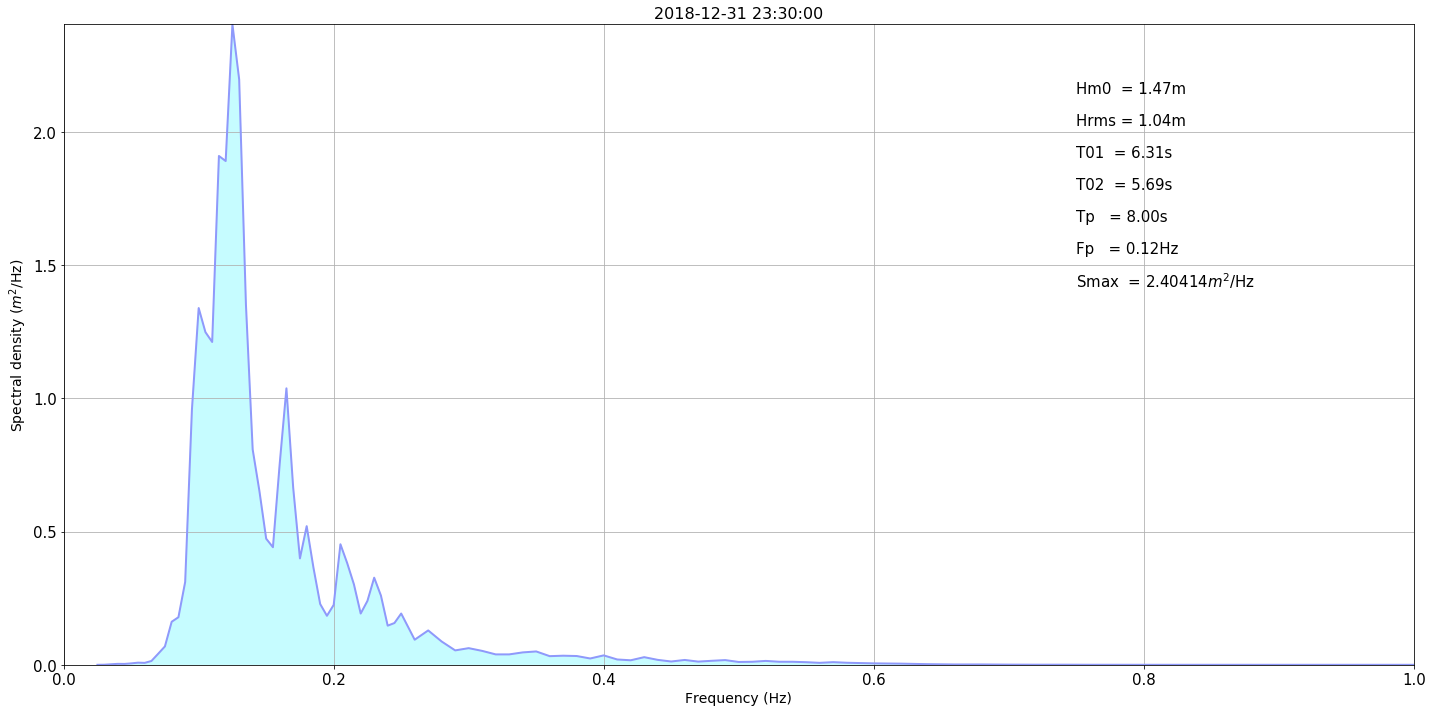

<Enter> to continue (or x to Exit) > x
Program ends


In [4]:
from tkinter import *
from tkinter import filedialog
from datetime import datetime, timedelta
from mpl_toolkits.mplot3d import Axes3D

import io
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Datawell_start_time = datetime(1970,1,1)

# Get name of input file
Input_ASCII_File = get_file()

with open(Input_ASCII_File,'r') as file:
     content = file.read()

s2=content.replace('\t ',', ').replace(' ',',')
df = pd.read_table(io.StringIO(s2),sep='\t',header=None)

Time_seconds = df.iloc[:-1][0]
Data_stamp = df.iloc[:-1][1]
No_of_segments = df.iloc[:-1][2]
Spectra_df = df.iloc[0:len(df)-1,3:103]; Spectra = Spectra_df.values

Date_array = []
for vals in Time_seconds: Date_array.append(Datawell_start_time+pd.Timedelta(seconds = vals))

# calculate frequency values for the Mk4 wave buoy
f_Mk4 = np.array(list(np.linspace(0.025,.25,num=46))+list(np.linspace(0.26,.58,num=33))\
                 +list(np.linspace(0.6,1,num=21)))
# get time values for the Mk4 frequencies
T_Mk4 = 1./f_Mk4

# get the spectral moments, and calculate various wave parameters
for i in range(len(Spectra)):

    m0,m1,m2 = Mk4_moments(f_Mk4,Spectra[i])

    print(Time_seconds[i])
    print('Hs = ',4.*np.sqrt(m0))
    print('Mean Period (T1) = ',m0/m1)
    print('Average Period (T02) = ',np.sqrt(m0/m2))

# calc wave parameters Hm0, Hrms, T01, T02, Tp
    Hm0 = 4*np.sqrt(m0); Hrms = np.sqrt(2)/2*Hm0
    T01 = m0/m1; T02 = np.sqrt(m0/m2)

# identify spectral peak and frequency as peak
    max_Spectra = max(Spectra[i])
    max_frequency = [k for k, j in enumerate(Spectra[i]) if j == np.max(Spectra[i])]
    Fp = f_Mk4[max_frequency[0]]; Tp = 1/Fp

    plt.figure(figsize=(20,10)) ###, dpi= 80, facecolor='w', edgecolor='k')
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.grid(True)
    plt.title(Date_array[i],fontsize=16)

    plt.xlabel('Frequency (Hz)',fontsize=14), plt.xlim(0, 1) # Display Frequency on X-axis
###    plt.xlabel('Time (s)',fontsize=14),plt.xlim(0, 40) # Display Frequency on X-axis
    left,right = plt.xlim()
    plt.ylim(ymin=0, ymax=max(Spectra[i]))
    plt.ylabel('Spectral density ($m^2$/Hz)',fontsize=14)
    plt.text(0.75*right,max_Spectra*0.90,'Hm0  = '+"%.2f" % Hm0+'m',horizontalalignment='left',verticalalignment='center',fontsize=15)
    plt.text(0.75*right,max_Spectra*0.85,'Hrms = '+"%.2f" % Hrms+'m',horizontalalignment='left',verticalalignment='center',fontsize=15)
    plt.text(0.75*right,max_Spectra*0.80,'T01  = '+"%.2f" % T01+'s',horizontalalignment='left',verticalalignment='center',fontsize=15)
    plt.text(0.75*right,max_Spectra*0.75,'T02  = '+"%.2f" % T02+'s',horizontalalignment='left',verticalalignment='center',fontsize=15)
    plt.text(0.75*right,max_Spectra*0.70,'Tp   = '+"%.2f" % Tp+'s',horizontalalignment='left',verticalalignment='center',fontsize=15)
    plt.text(0.75*right,max_Spectra*0.65,'Fp   = '+"%.2f" % Fp+'Hz',horizontalalignment='left',verticalalignment='center',fontsize=15)
    plt.text(0.75*right,max_Spectra*0.60,'Smax  = '+"%.5f" % max_Spectra+'$m^2$/Hz',horizontalalignment='left',verticalalignment='center',fontsize=15)

    plt.plot(f_Mk4,Spectra[i],c='xkcd:periwinkle blue',linewidth=2)
    plt.fill(f_Mk4,Spectra[i],c='xkcd:light sky blue')
###    plt.plot(T_Mk4,Spectra[i],linewidth=3)
    plt.tight_layout()
    plt.show()

# continue loop until user enters "x"
    choice = input("<Enter> to continue (or x to Exit) > ")
    plt.close()
    if choice.lower() == 'x' :
        print('Program ends')
        break